<a href="https://colab.research.google.com/github/LucasEduardo08/Projeto-Data-Science/blob/main/ModelosClassicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p>O objetivo deste colab é praticar os modelos clássicos de previsão de séries temporais.<p>


In [1]:
# bibliotecas usadas
import yfinance as yf
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Carregando os dados

<p>Os dados utilizados para testar os modelos vai ser os dados da Petrobras no momento da pandemia da COVID-19 até o último dia do mês de maio de 2023.<p>

In [2]:
# A ação que vou usar ao longo do colab
acao = 'PETR4.SA'

# Importando as informações da ação
petr_data = yf.download(acao, start='2019-12-29', end='2023-05-31')

# Verificando os dados
petr_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-30,30.549999,30.709999,30.150000,30.180000,11.534129,22111600
2020-01-02,30.510000,30.700001,30.309999,30.700001,11.732863,37774500
2020-01-03,30.879999,31.240000,30.450001,30.450001,11.637319,71595600
2020-01-06,30.430000,30.940001,29.950001,30.809999,11.774900,81844000
2020-01-07,30.820000,30.879999,30.469999,30.690001,11.729041,32822000
...,...,...,...,...,...,...
2023-05-24,26.250000,26.900000,26.049999,26.650000,24.093679,54796400
2023-05-25,26.799999,26.840000,26.190001,26.450001,23.912865,49182700
2023-05-26,26.809999,26.910000,26.530001,26.799999,24.229290,39866600


In [ ]:
# Verificando a forma do dataset
petr_data.shape

(848, 6)

In [ ]:
# Verificando as informações do dataset
petr_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 848 entries, 2019-12-30 to 2023-05-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       848 non-null    float64
 1   High       848 non-null    float64
 2   Low        848 non-null    float64
 3   Close      848 non-null    float64
 4   Adj Close  848 non-null    float64
 5   Volume     848 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 78.7 KB


In [ ]:
# Verificando se há valores nulos, só para confirmar
petr_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<p>Agora será carregado o restante <p>

In [3]:
# Importando as informações da ação
petr_teste = yf.download('PETR4.SA', start='2023-06-01', end='2023-08-18')

# Verificando os dados
petr_teste.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-01,26.299999,27.000000,26.160000,26.959999,24.373941,63148200
2023-06-02,27.430000,27.600000,27.110001,27.180000,24.572840,39919300
2023-06-05,27.540001,27.559999,27.230000,27.469999,24.835022,39321700
2023-06-06,27.450001,28.250000,27.209999,28.049999,25.359386,75426600
2023-06-07,28.650000,29.059999,28.430000,28.870001,26.100733,82330400


In [ ]:
# Formato dos dados de teste
petr_teste.shape

(55, 6)

<p>A base de dados de teste será usada quando for testar os algoritmos.<p>

# Análise Exploratória dos Dados

<p>Antes de testar os modelos, será feito uma análise para conhecer melhor a ação e como ela se comporta no período em que foi coletado.<p>

<p>Logo abaixo será mostrado o Candlestick ou gráfico de velas, muito utilizado pelos invertidores para análise da ação.<p>

In [ ]:
# Fazendo o gráfico do candlestick
fig = go.Figure(data=[go.Candlestick(x=petr_data.index,
                                     open=petr_data['Open'],
                                     high=petr_data['High'],
                                     low=petr_data['Low'],
                                     close=petr_data['Close'])])

# Exibindo
fig.show()

<p>É possível ver que na metade do ano de 2020 a ação teve uma queda bem gigante, pode ser explicada pelo fato da COVID-19 estar abalando o mundo todo e a demanda pelo petróleo diminuiu bastante, além da queda do preço.<p>

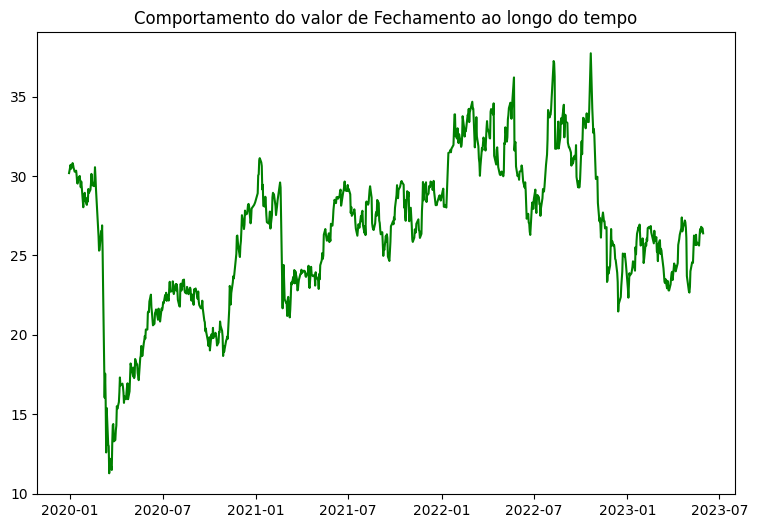

In [ ]:
# Visualizando o comportamento do preço de fechamento

# Tamanho do gráfico
plt.figure(figsize=(9,6))

# Criando o gráfico
plt.plot(petr_data.index, petr_data['Close'], color='green')

# Colocando o título e exibindo o gráfico
plt.title("Comportamento do valor de Fechamento ao longo do tempo")
plt.show()

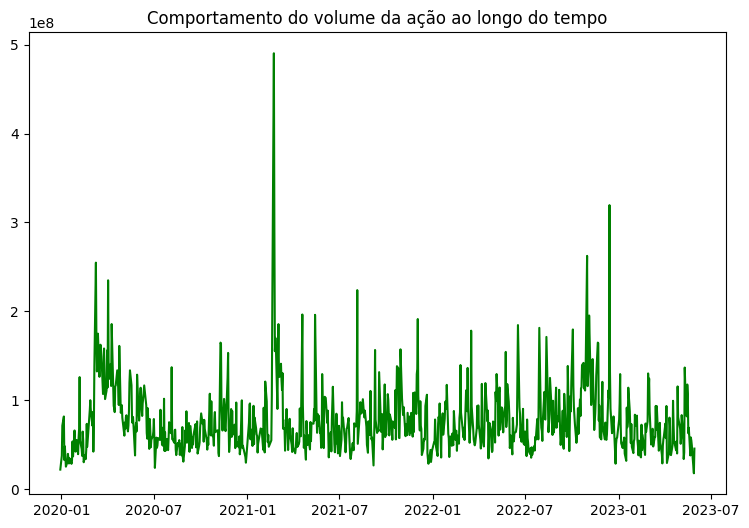

In [ ]:
# Verificando o comportamento do volume de compra/venda da ação
# Tamanho do gráfico
plt.figure(figsize=(9,6))

# Criando o gráfico
plt.plot(petr_data.index, petr_data['Volume'], color='green')

# Colocando o título e exibindo o gráfico
plt.title("Comportamento do volume da ação ao longo do tempo")
plt.show()

<p>Como pode ser visto, com a queda a ação na metade de 2020 o volume aumentou consideravelmente, visto que estava barata e é comum (Mas não absolutamente certo, depende isso) comprar uma ações no período de baixa.<p>
<p>Com a valorização da ação, entre os meses de Janeiro e Março de 2021 novamente o volume aumentou e aumentou muito.<p>

In [ ]:
# Visualizando um resumo estatístico da ação
petr_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,848.000000,848.000000,848.000000,848.000000,848.000000,8.480000e+02
mean,26.458384,26.897170,26.004917,26.449752,14.056459,7.719728e+07
std,4.615820,4.647220,4.602289,4.632807,5.350843,3.852187e+07
min,11.070000,12.180000,10.850000,11.290000,4.479263,1.797710e+07
25%,23.340000,23.680000,23.017500,23.337500,9.528563,5.251032e+07
50%,26.830000,27.250000,26.370001,26.799999,11.944451,6.823565e+07
75%,29.515000,29.850000,29.032501,29.455000,18.512809,9.114082e+07
max,37.650002,38.389999,36.849998,37.720001,27.568058,4.902304e+08


<p>A variável de estudo para alguns modelos que são univariados será o preço de fechamento.<p>

# Modelos Clássicos

## Médias móveis

<p>Para os valores q da Média Móvel MA(q), será escolhido 4 valores para análise: 5, 10, 15, 20.<p>

In [ ]:
# Definindo o número de janelas
janela = [5, 10, 15, 20]

# janela móvel
media_movel_5 = petr_data['Close'].rolling(janela[0]).mean()
media_movel_10 = petr_data['Close'].rolling(janela[1]).mean()
media_movel_15 = petr_data['Close'].rolling(janela[2]).mean()
media_movel_20 = petr_data['Close'].rolling(janela[3]).mean()

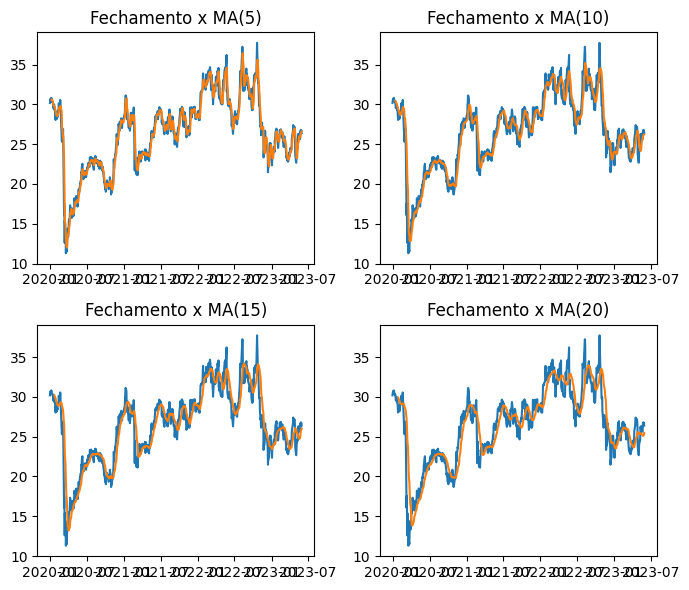

In [ ]:
# 4 gráficos para cada valor da janela
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(7,6))

axis[0,0].plot(petr_data['Close'])
axis[0,0].plot(media_movel_5)
axis[0,0].set_title("Fechamento x MA(5)")

axis[0,1].plot(petr_data['Close'])
axis[0,1].plot(media_movel_10)
axis[0,1].set_title("Fechamento x MA(10)")

axis[1,0].plot(petr_data['Close'])
axis[1,0].plot(media_movel_15)
axis[1,0].set_title("Fechamento x MA(15)")

axis[1,1].plot(petr_data['Close'])
axis[1,1].plot(media_movel_20)
axis[1,1].set_title("Fechamento x MA(20)")

# Ajuste os espaçamentos entre os subplots
plt.tight_layout()

# Mostra o gráfico completo
plt.show()

<p>Como é possível ver, quanto maior o parâmetro q, mais ajustado o modelo fica aos valores da ação.<p>

In [ ]:
# Calculando o erro médio absoluto
mae_5 = np.mean(np.abs(petr_data['Close'][4:] - media_movel_5[4:]))
mae_10 = np.mean(np.abs(petr_data['Close'][9:] - media_movel_5[9:]))
mae_15 = np.mean(np.abs(petr_data['Close'][14:] - media_movel_5[14:]))
mae_20 = np.mean(np.abs(petr_data['Close'][19:] - media_movel_5[19:]))

print(f"MA(5): {mae_5}\nMA(10): {mae_10}\nMA(15): {mae_15}\nMA(20): {mae_20}")

MA(5): 0.6153672891770495
MA(10): 0.6180858061907546
MA(15): 0.6200047852038194
MA(20): 0.621445103404893


### Fazer da data 01/06/2023 até 15/08/2023

## Autoregressivo

In [ ]:
# Cria o modelo
autoReg = AutoReg(petr_data['Close'], lags=4, period=3)

# Treina o modelo
resultado = autoReg.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Resumo do modelo
print(resultado.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                  848
Model:                     AutoReg(4)   Log Likelihood               -1016.737
Method:               Conditional MLE   S.D. of innovations              0.807
Date:                Sun, 20 Aug 2023   AIC                           2045.475
Time:                        17:18:18   BIC                           2073.904
Sample:                             4   HQIC                          2056.368
                                  848                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4171      0.163      2.565      0.010       0.098       0.736
Close.L1       0.9834      0.034     28.577      0.000       0.916       1.051
Close.L2      -0.0044      0.048     -0.090      0.9

<p>A fórmula do modelo é:<p>
$$ y_{t} = 0.4171 + 0.9834*y_{t-1} - 0.0044*y_{t-2} + 0.0215*y_{t-3} - 0.0165*y_{t-4}$$

In [ ]:
# Previsão dos dados
previsao = resultado.predict(start=len(petr_data), end=len(petr_data)+54)
previsao

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


848    26.392052
849    26.387227
850    26.377843
851    26.373640
852    26.369410
853    26.365147
854    26.361037
855    26.356993
856    26.353012
857    26.349097
858    26.345245
859    26.341455
860    26.337727
861    26.334059
862    26.330450
863    26.326900
864    26.323407
865    26.319970
866    26.316589
867    26.313262
868    26.309990
869    26.306770
870    26.303602
871    26.300486
872    26.297420
873    26.294403
874    26.291435
875    26.288515
876    26.285643
877    26.282816
878    26.280036
879    26.277300
880    26.274609
881    26.271961
882    26.269356
883    26.266793
884    26.264271
885    26.261791
886    26.259350
887    26.256949
888    26.254586
889    26.252262
890    26.249975
891    26.247726
892    26.245512
893    26.243335
894    26.241192
895    26.239084
896    26.237011
897    26.234971
898    26.232963
899    26.230989
900    26.229046
901    26.227134
902    26.225254
dtype: float64

In [ ]:
petr_teste['Close'][0:-1]

Date
2023-06-01    26.959999
2023-06-02    27.180000
2023-06-05    27.469999
2023-06-06    28.049999
2023-06-07    28.870001
2023-06-09    30.280001
2023-06-12    30.809999
2023-06-13    28.860001
2023-06-14    30.100000
2023-06-15    29.389999
2023-06-16    29.639999
2023-06-19    30.420000
2023-06-20    30.570000
2023-06-21    31.850000
2023-06-22    31.450001
2023-06-23    30.160000
2023-06-26    30.840000
2023-06-27    30.600000
2023-06-28    30.889999
2023-06-29    31.030001
2023-06-30    29.530001
2023-07-03    30.080000
2023-07-04    30.150000
2023-07-05    30.110001
2023-07-06    29.650000
2023-07-07    29.500000
2023-07-10    29.549999
2023-07-11    29.150000
2023-07-12    29.170000
2023-07-13    29.629999
2023-07-14    29.049999
2023-07-17    28.990000
2023-07-18    28.830000
2023-07-19    29.100000
2023-07-20    29.129999
2023-07-21    29.680000
2023-07-24    30.299999
2023-07-25    31.000000
2023-07-26    31.000000
2023-07-27    29.389999
2023-07-28    29.760000
2023-07-31 

In [ ]:
previsao

848    26.392052
849    26.387227
850    26.377843
851    26.373640
852    26.369410
853    26.365147
854    26.361037
855    26.356993
856    26.353012
857    26.349097
858    26.345245
859    26.341455
860    26.337727
861    26.334059
862    26.330450
863    26.326900
864    26.323407
865    26.319970
866    26.316589
867    26.313262
868    26.309990
869    26.306770
870    26.303602
871    26.300486
872    26.297420
873    26.294403
874    26.291435
875    26.288515
876    26.285643
877    26.282816
878    26.280036
879    26.277300
880    26.274609
881    26.271961
882    26.269356
883    26.266793
884    26.264271
885    26.261791
886    26.259350
887    26.256949
888    26.254586
889    26.252262
890    26.249975
891    26.247726
892    26.245512
893    26.243335
894    26.241192
895    26.239084
896    26.237011
897    26.234971
898    26.232963
899    26.230989
900    26.229046
901    26.227134
902    26.225254
dtype: float64

In [ ]:
# colocando os índices para a previsao
previsao.index = petr_teste.index
previsao.head()

Date
2023-06-01    26.392052
2023-06-02    26.387227
2023-06-05    26.377843
2023-06-06    26.373640
2023-06-07    26.369410
dtype: float64

In [ ]:
# Unindo em um dataframe
resul_AR = pd.DataFrame({"Fechamento": petr_teste['Close'], "Previsao": previsao}, index=petr_teste.index)
resul_AR.head()

,Fechamento,Previsao
Date,,
2023-06-01,26.959999,26.392052
2023-06-02,27.180000,26.387227
2023-06-05,27.469999,26.377843
2023-06-06,28.049999,26.373640
2023-06-07,28.870001,26.369410


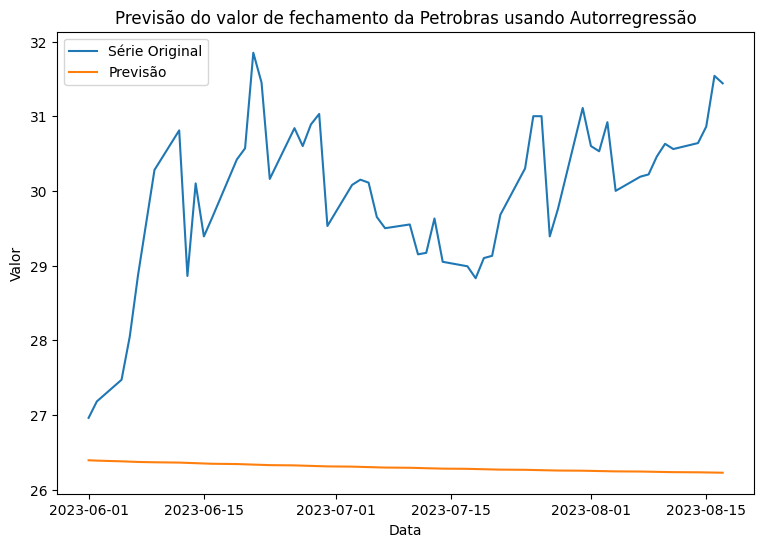

In [ ]:
# Plotando um gráfico
plt.figure(figsize=(9,6))
plt.plot(resul_AR['Fechamento'], label='Série Original')
plt.plot(resul_AR['Previsao'], label='Previsão')
plt.legend()
plt.title('Previsão do valor de fechamento da Petrobras usando Autorregressão')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.show()

In [ ]:
# Calculando o erro médio absoluto
diferenca = np.mean(np.abs(resul_AR['Fechamento'] - resul_AR['Previsao']))
diferenca

3.6665625888927047

## ARIMA

In [ ]:
# Criando o modelo
modelo_ARIMA = ARIMA(petr_data['Close'], order=(4, 0, 20))

# Treinando o modelo
resultados_ARIMA = modelo_ARIMA.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Visualiza o resumo do modelo
print(resultados_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  848
Model:                ARIMA(4, 0, 20)   Log Likelihood               -1010.414
Date:                Tue, 22 Aug 2023   AIC                           2072.828
Time:                        17:52:38   BIC                           2196.143
Sample:                             0   HQIC                          2120.069
                                - 848                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.5258      1.854     14.307      0.000      22.892      30.160
ar.L1          1.3505      1.706      0.791      0.429      -1.994       4.695
ar.L2         -0.9898      1.434     -0.690      0.4

In [ ]:
# Previsão dos dados
previsao = resultados_ARIMA.predict(start=len(petr_data), end=len(petr_data)+54)
#previsao = resultados_ARIMA.predict(start=0, end=len(petr_data)-1)
previsao

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


848    26.350211
849    26.328173
850    26.348685
851    26.304293
852    26.326450
853    26.287992
854    26.193091
855    26.251704
856    26.266050
857    26.234147
858    26.236824
859    26.277245
860    26.278937
861    26.250448
862    26.229610
863    26.280858
864    26.276841
865    26.251049
866    26.283963
867    26.310471
868    26.291437
869    26.285913
870    26.311022
871    26.318450
872    26.306131
873    26.311317
874    26.327363
875    26.327507
876    26.322770
877    26.331035
878    26.339969
879    26.338746
880    26.339139
881    26.346756
882    26.351413
883    26.351123
884    26.354059
885    26.359916
886    26.362559
887    26.363585
888    26.367300
889    26.371535
890    26.373506
891    26.375481
892    26.379070
893    26.382196
894    26.384100
895    26.386530
896    26.389675
897    26.392168
898    26.394170
899    26.396686
900    26.399371
901    26.401541
902    26.403612
Name: predicted_mean, dtype: float64

In [ ]:
previsao.index = petr_teste['Close'].index
#previsao.index = petr_data['Close'].index

# Unindo em um dataframe
resul_ARIMA = pd.DataFrame({"Fechamento": petr_teste['Close'], "Previsao": previsao}, index=petr_teste.index)
#resul_ARIMA = pd.DataFrame({"Fechamento": petr_data['Close'], "Previsao": previsao}, index=petr_data.index)
resul_ARIMA.head()

,Fechamento,Previsao
Date,,
2023-06-01,26.959999,26.350211
2023-06-02,27.180000,26.328173
2023-06-05,27.469999,26.348685
2023-06-06,28.049999,26.304293
2023-06-07,28.870001,26.326450


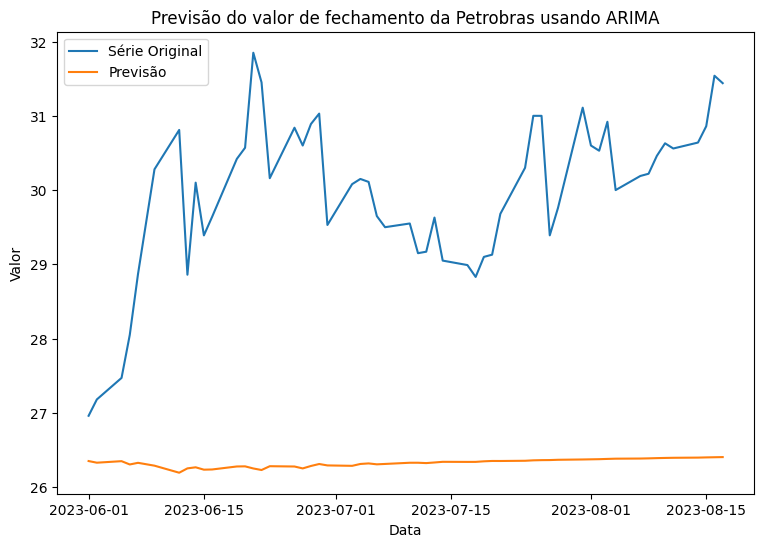

In [ ]:
# Plotando um gráfico
plt.figure(figsize=(9,6))
plt.plot(resul_ARIMA['Fechamento'], label='Série Original')
plt.plot(resul_ARIMA['Previsao'], label='Previsão')
plt.legend()
plt.title('Previsão do valor de fechamento da Petrobras usando ARIMA')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.show()

In [ ]:
# Calculando o erro médio absoluto
diferenca = np.mean(np.abs(resul_ARIMA['Fechamento'] - resul_ARIMA['Previsao']))
diferenca

3.633923689400534

##  Holt-Winters

In [4]:
# Criando o modelo
modelo_HW = ExponentialSmoothing(petr_data['Close'])

# Treina o modelo
resultado_HW = modelo_HW.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [6]:
# Prevendo os valores
previsao = resultado_HW.predict(start=len(petr_teste), end=len(petr_teste)+54)
previsao.index = petr_teste.index
previsao

Date
2023-06-01    12.201773
2023-06-02    12.001835
2023-06-05    11.504565
2023-06-06    13.234123
2023-06-07    14.310122
2023-06-09    14.389274
2023-06-12    13.309909
2023-06-13    13.379363
2023-06-14    13.984445
2023-06-15    14.297130
2023-06-16    15.498967
2023-06-19    15.341446
2023-06-20    15.766102
2023-06-21    16.394233
2023-06-22    17.311579
2023-06-23    16.824471
2023-06-26    16.929040
2023-06-27    16.731810
2023-06-28    16.383199
2023-06-29    15.726033
2023-06-30    16.126325
2023-07-03    15.951604
2023-07-04    16.742737
2023-07-05    16.948115
2023-07-06    15.959079
2023-07-07    16.445535
2023-07-10    17.242682
2023-07-11    18.191293
2023-07-12    18.051285
2023-07-13    17.386105
2023-07-14    17.934962
2023-07-17    17.285959
2023-07-18    17.438599
2023-07-19    18.470527
2023-07-20    18.152915
2023-07-21    18.140117
2023-07-24    17.595004
2023-07-25    17.401773
2023-07-26    17.152290
2023-07-27    18.527378
2023-07-28    18.678612
2023-07-31 

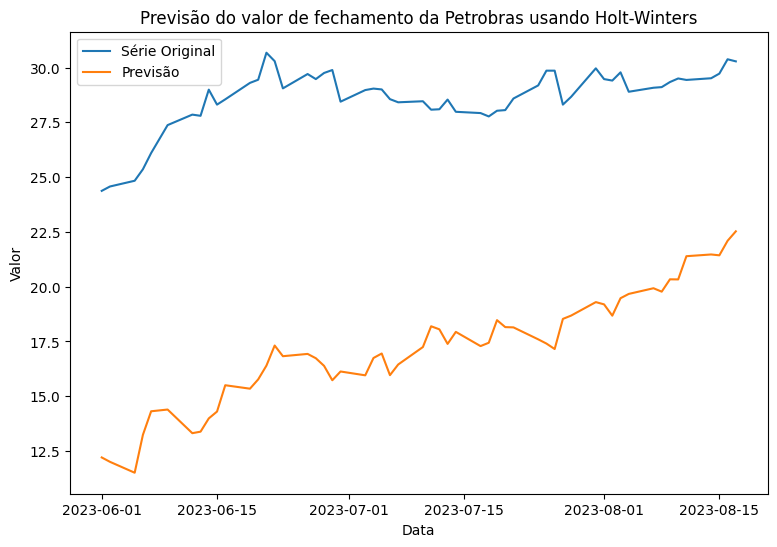

In [7]:
# Plotando um gráfico
plt.figure(figsize=(9,6))
plt.plot(petr_teste['Adj Close'], label='Série Original')
plt.plot(previsao, label='Previsão')
plt.legend()
plt.title('Previsão do valor de fechamento da Petrobras usando Holt-Winters')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.show()

In [8]:
# Calculando o erro médio absoluto
diferenca = np.mean(np.abs(petr_teste['Adj Close'] - previsao))
diferenca

11.42957830809972